In [31]:
pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 10.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Importing libraries required for the optimization

import json
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import scipy

# data retrieval from the local storage

json_file_path = "/Users/vamsy/Downloads/Soptimizers.json"  
with open(json_file_path, 'r') as file:
    data = json.load(file)
print(data)

[{'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['A', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Reci

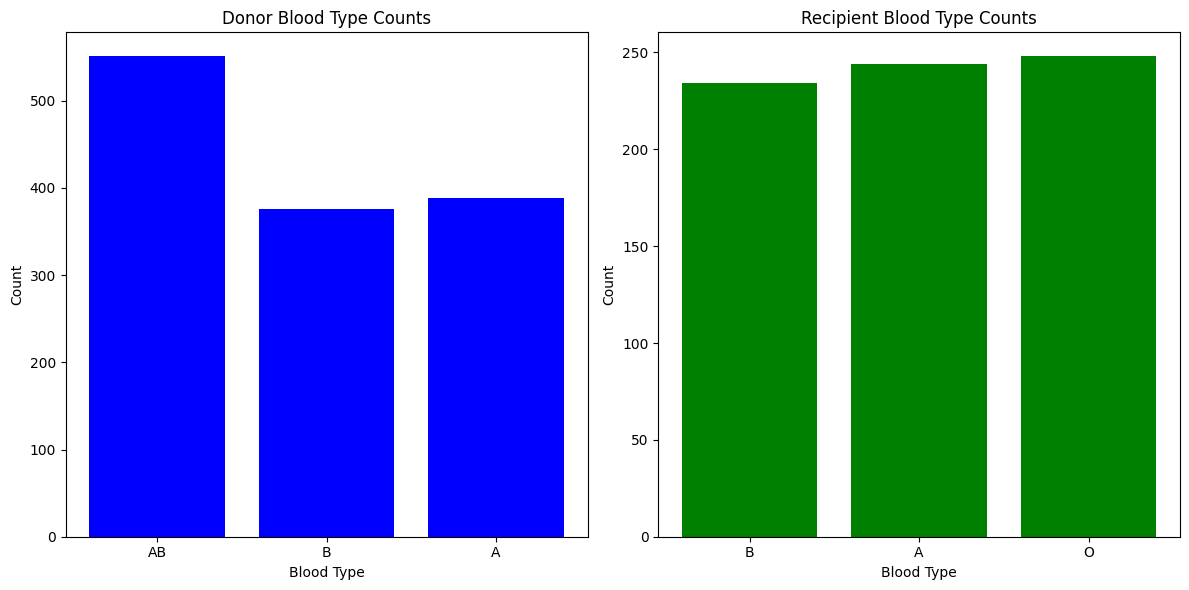

In [30]:
# dictionaries to keep track of counts
donor_counts = {}
recipient_counts = {}


for entry in data:
    # recipient
    recipient_blood_type = entry['Recipient']
    recipient_counts[recipient_blood_type] = recipient_counts.get(recipient_blood_type, 0) + 1

    # donor
    donors = entry['Donor']
    for donor_blood_type in donors:
        donor_counts[donor_blood_type] = donor_counts.get(donor_blood_type, 0) + 1

# Visualization
import matplotlib.pyplot as plt

# Data for plotting
blood_types_d = list(donor_counts.keys())
counts_d = [donor_counts[blood_type] for blood_type in blood_types_d]

blood_types_r = list(recipient_counts.keys())
counts_r = [recipient_counts[blood_type] for blood_type in blood_types_r]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(blood_types_d, counts_d, color='blue')
axs[0].set_title('Donor Blood Type Counts')
axs[0].set_xlabel('Blood Type')
axs[0].set_ylabel('Count')

axs[1].bar(blood_types_r, counts_r, color='green')
axs[1].set_title('Recipient Blood Type Counts')
axs[1].set_xlabel('Blood Type')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [22]:
import networkx as nx
# Creating a graph for the nodes and edges
G = nx.DiGraph()

# Create the respective nodes
counter = 0
for element in data:
    #print(element)
    G.add_nodes_from([(counter, element)])
    counter += 1



donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges (relations)
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
print("The number of nodes:",len(G.nodes))
print("the number of edges:",len(G.edges))
print('edges:', G.edges)


The number of nodes: 726
the number of edges: 182656
edges: [(1, 0), (1, 4), (1, 5), (1, 7), (1, 8), (1, 9), (1, 11), (1, 14), (1, 16), (1, 17), (1, 20), (1, 21), (1, 23), (1, 28), (1, 31), (1, 32), (1, 34), (1, 39), (1, 43), (1, 44), (1, 45), (1, 46), (1, 49), (1, 51), (1, 55), (1, 59), (1, 63), (1, 65), (1, 71), (1, 78), (1, 79), (1, 80), (1, 87), (1, 95), (1, 98), (1, 99), (1, 100), (1, 102), (1, 103), (1, 104), (1, 106), (1, 108), (1, 110), (1, 116), (1, 119), (1, 120), (1, 128), (1, 129), (1, 130), (1, 134), (1, 139), (1, 140), (1, 145), (1, 151), (1, 153), (1, 160), (1, 166), (1, 173), (1, 175), (1, 180), (1, 184), (1, 187), (1, 189), (1, 190), (1, 198), (1, 200), (1, 201), (1, 203), (1, 204), (1, 213), (1, 214), (1, 217), (1, 224), (1, 225), (1, 228), (1, 232), (1, 237), (1, 238), (1, 239), (1, 245), (1, 254), (1, 259), (1, 265), (1, 267), (1, 269), (1, 273), (1, 277), (1, 278), (1, 281), (1, 282), (1, 284), (1, 288), (1, 290), (1, 293), (1, 294), (1, 299), (1, 301), (1, 307), (

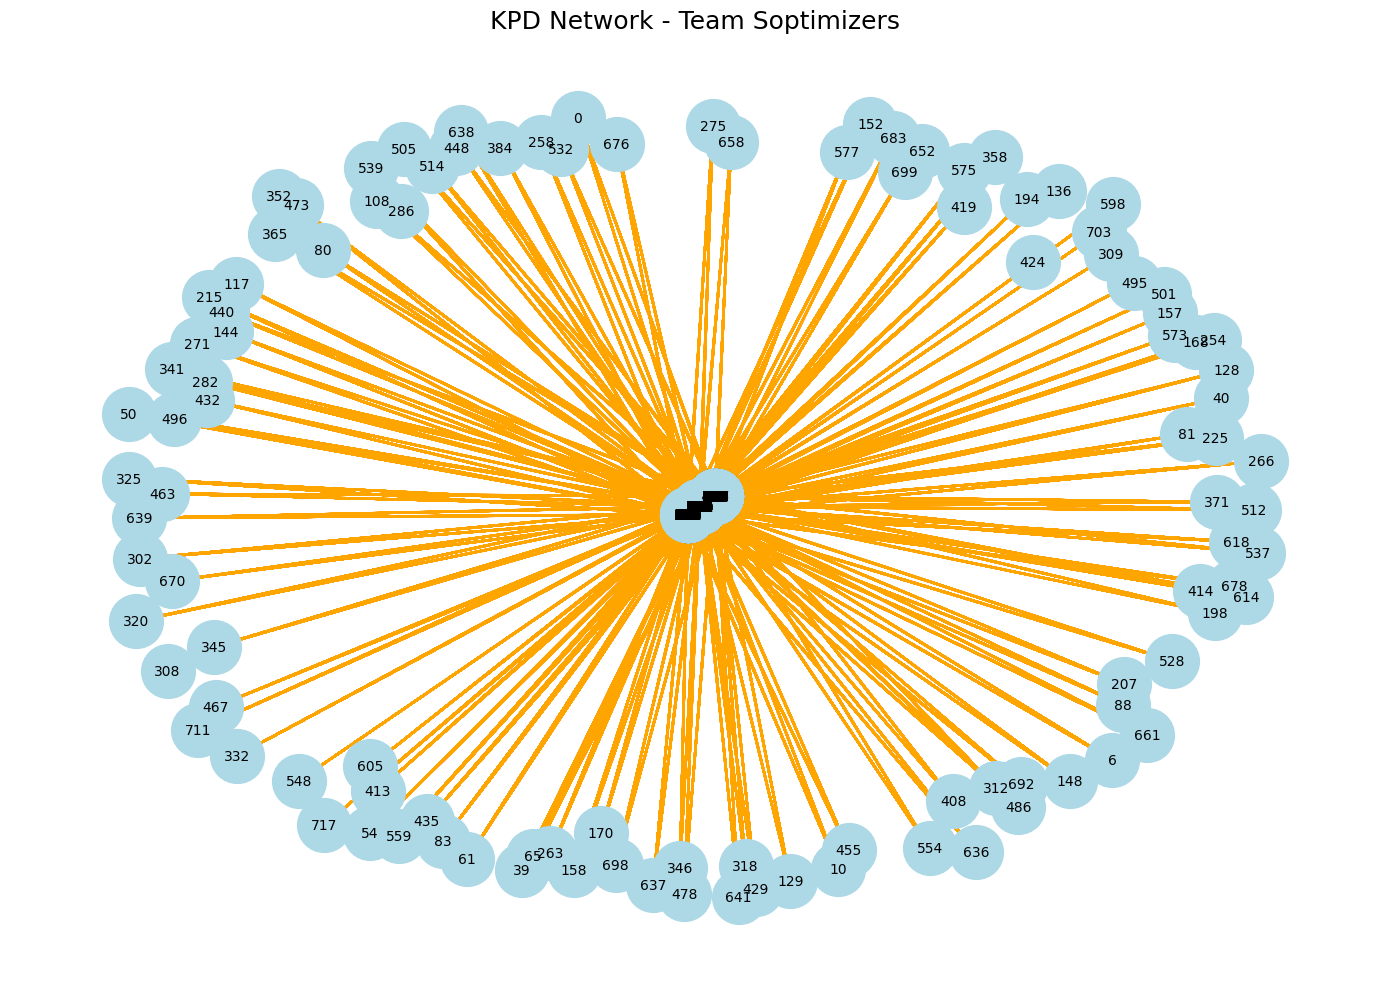

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your graph
plt.figure(figsize=(14, 10))

# Create a layout for the nodes
pos = nx.spring_layout(G, seed=42)  # Spring layout for structure

# Draw all nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=1500,
    node_color="lightblue",
    label="Nodes"
)

# Draw edges with clear arrows
nx.draw_networkx_edges(
    G,
    pos,
    edge_color="orange",
    arrowstyle="->",
    arrowsize=15,
    width=1.5,
    alpha=0.8
)

# Add numeric labels to nodes
nx.draw_networkx_labels(
    G,
    pos,
    labels={node: str(node) for node in G.nodes},
    font_size=10,
    font_color="black"
)

# Add a title
plt.title("KPD Network - Team Soptimizers", fontsize=18)
plt.axis("off")  # Turn off the axis
plt.tight_layout()

# Show the graph
plt.show()

In [15]:
# FINDING THE CYCLES OF SIZE 2

cycle_2 = []

for (i,j) in G.edges:
    G.edges[(i,j)]["visited"] = False

for (i,j) in G.edges:
    if G.edges[(i,j)]["visited"] == True: continue
    if (j,i) in G.edges:
        cycle_2.append((i,j,i))
        G.edges[(j,i)]["visited"] = True
            
print("Count of cycles of length 2:", len(cycle_2))
print("Cycles of length 2:",cycle_2)

Count of cycles of length 2: 35150
Cycles of length 2: [(1, 4, 1), (1, 5, 1), (1, 7, 1), (1, 8, 1), (1, 9, 1), (1, 11, 1), (1, 14, 1), (1, 16, 1), (1, 17, 1), (1, 20, 1), (1, 21, 1), (1, 23, 1), (1, 28, 1), (1, 31, 1), (1, 32, 1), (1, 34, 1), (1, 43, 1), (1, 44, 1), (1, 45, 1), (1, 46, 1), (1, 49, 1), (1, 51, 1), (1, 55, 1), (1, 59, 1), (1, 63, 1), (1, 71, 1), (1, 78, 1), (1, 79, 1), (1, 87, 1), (1, 95, 1), (1, 98, 1), (1, 99, 1), (1, 100, 1), (1, 102, 1), (1, 103, 1), (1, 104, 1), (1, 106, 1), (1, 110, 1), (1, 116, 1), (1, 119, 1), (1, 120, 1), (1, 130, 1), (1, 134, 1), (1, 139, 1), (1, 140, 1), (1, 145, 1), (1, 151, 1), (1, 153, 1), (1, 160, 1), (1, 166, 1), (1, 173, 1), (1, 175, 1), (1, 180, 1), (1, 184, 1), (1, 187, 1), (1, 189, 1), (1, 190, 1), (1, 200, 1), (1, 201, 1), (1, 203, 1), (1, 204, 1), (1, 213, 1), (1, 214, 1), (1, 217, 1), (1, 224, 1), (1, 228, 1), (1, 232, 1), (1, 237, 1), (1, 238, 1), (1, 239, 1), (1, 245, 1), (1, 259, 1), (1, 265, 1), (1, 267, 1), (1, 269, 1), (1, 27

In [5]:
# FINDING THE CYCLES OF SIZE 3 

cycle_3 = []

for (i, j) in G.edges:
    G.edges[(i, j)]["visited"] = False

# Detecting cycles of size 3 using the following 
for (i, j) in G.edges:
    if G.edges[(i, j)]["visited"] == True:
        continue
    for k in G.successors(j):  # 
        if k != i and (k, i) in G.edges:  
            cycle_3.append((i, j, k, i))
            G.edges[(j, k)]["visited"] = True  
            G.edges[(k, i)]["visited"] = True

# Printing the count and the cycles
print("Count of cycles of length 3:", len(cycle_3))
print("Cycles of length 3:", cycle_3)

Count of cycles of length 3: 0
Cycles of length 3: []


In [16]:
import gurobipy as gp
from gurobipy import GRB

# Creating the Gurobi model
m = gp.Model()

# Adding variables for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY, name="x")

# Set the objective: maximize the number of selected edges (matches)
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# Adding constraint: at most one incoming arc per node
m.addConstrs(
    gp.quicksum(x[(u, v)] for u in G.predecessors(v) if (u, v) in G.edges) <= 1
    for v in G.nodes
)

# Add constraints
m.addConstrs(
    gp.quicksum(x[(u, v)] for u in G.predecessors(v) if (u, v) in G.edges) ==
    gp.quicksum(x[(v, u)] for u in G.successors(v) if (v, u) in G.edges)
    for v in G.nodes
)

# Optimize the model
m.optimize()

# finding out the active edges
active_edges = [(u, v) for u, v in G.edges if x[(u, v)].x > 0.5]
print("Optimal matching edges:", active_edges)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 22.6.0 22G720)

CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1452 rows, 182656 columns and 547968 nonzeros
Model fingerprint: 0xc8370b02
Variable types: 0 continuous, 182656 integer (182656 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 702 rows and 111981 columns
Presolve time: 0.70s
Presolved: 750 rows, 70675 columns, 141350 nonzeros
Variable types: 0 continuous, 70675 integer (70675 binary)

Root relaxation: objective 3.700000e+02, 1729 iterations, 0.32 seconds (0.26 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

